# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Several libraries are imported into this code to carry out necessary operations pertaining to data processing, modeling, scaling, warning suppression, and visualization. Pandas is used to manage and modify datasets; numpy is used to perform numerical computations; seaborn and matplotlib are used to generate visuals such as graphs and plots. The dataset is scaled using the MinMaxScaler from sklearn.preprocessing, and the training and testing sets are separated using train_test_split. GridSearchCV is then used to fine-tune the hyperparameters. To evaluate the performance of the model, a variety of evaluation measures are imported, including tools for creating confusion matrices and ROC curves, as well as accuracy, precision, recall, F1 score, and ROC-AUC. In order to avoid displaying needless caution messages, warnings are finally disabled.

In [2]:
#using the library to alter the data-set.
import pandas as ppd
#bringing in the infor-mation calculation methods
import numpy as nym
#Here, the libraries serve to draw the graph.
import seaborn as sns
#used this visualization library to create visual representations
import matplotlib.pyplot as mpl
# for scalling information-set we use the library
from sklearn.preprocessing import MinMaxScaler
# here we use the splitting module for dividing information
from sklearn.model_selection import train_test_split,GridSearchCV
# Importing variousn from the  module
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,auc,confusion_matrix,classification_report
# Suppress all caustions
import warnings
warnings.filterwarnings("ignore")

# Read Test Dataset

In [3]:
# executing the information of examined data
test_data =ppd.read_csv('/content/drive/MyDrive/UNSW_NB15_testing-set.csv')
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


# Read Train Dataset

In [4]:
train_data=ppd.read_csv('/content/drive/MyDrive/UNSW_NB15_training-set.csv')
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


# Dataset Information

In [5]:
test_data.shape

(175341, 45)

In [6]:
train_data.shape

(82332, 45)

In [7]:
com_df=ppd.concat([train_data,test_data],axis=0,ignore_index=True)

In [8]:
com_df.shape

(257673, 45)

In [9]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [10]:
com_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [11]:
com_df.isnull().sum()

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [12]:
com_df.duplicated().sum()

0

In [13]:
com_df['attack_cat'].value_counts()

,count
attack_cat,
Normal,93000
Generic,58871
Exploits,44525
Fuzzers,24246
DoS,16353
Reconnaissance,13987
Analysis,2677
Backdoor,2329
Shellcode,1511


# Count Plot

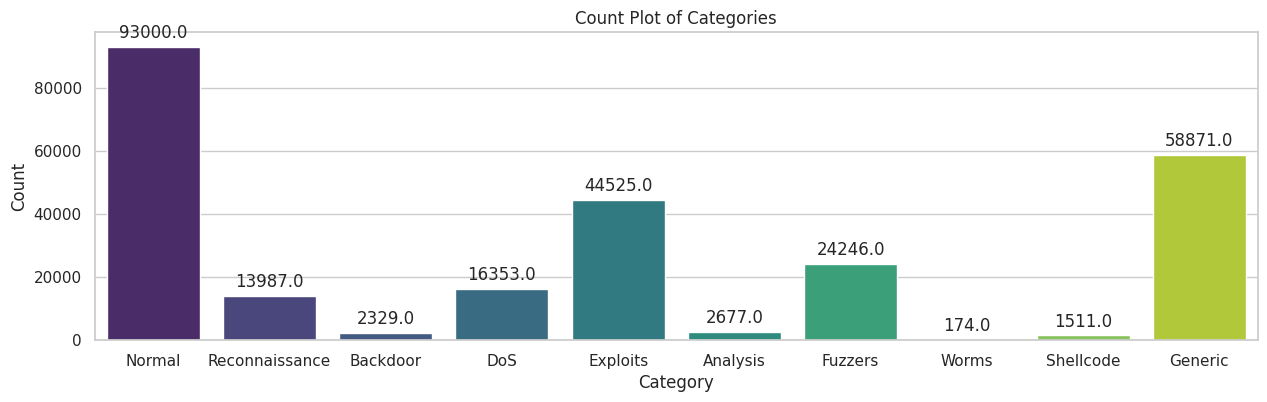

In [14]:
# Assuming the shaping is your merged DataFrame
mpl.figure(figsize=(15,4))
sns.set(style="whitegrid")

# Creating the counting graph with a colorful palette
ax = sns.countplot(x='attack_cat', data=com_df, palette='viridis')

# Annotate the plotted with the counted of each category
for p in ax.patches:
    # Use the of the bar as the annotation text
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2.,p.get_height()),
                # Positioning the anno-tation at the center-top of the bar
                ha='center',va='center',xytext=(0, 10),textcoords='offset points')

# setting the header text in the plot
mpl.title('Count Plot of Categories')
# print the x-labl in the graph
mpl.xlabel('Category')
# print the y-labl in the graph
mpl.ylabel('Count')
# displaying the plot
mpl.show()

# Drop Columns

In [15]:
com_df.drop(columns=['id','sttl','dttl','ct_srv_src','ct_state_ttl','ct_dst_ltm','ct_dst_src_ltm','ct_src_ltm','ct_srv_dst'], inplace=True)

# Label Encoding

In [16]:
# setting the library for encoding the data to numeric
from sklearn.preprocessing import LabelEncoder

# fetching the columns that is objective
object_cols=com_df.select_dtypes(include=['object']).columns

# Applying module to object columns
label_encoder=LabelEncoder()
# setting the lopping the method
for col in object_cols:
    # provide the data to the modules
    com_df[col] = label_encoder.fit_transform(com_df[col])

In [17]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  int64  
 2   service            257673 non-null  int64  
 3   state              257673 non-null  int64  
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sload              257673 non-null  float64
 10  dload              257673 non-null  float64
 11  sloss              257673 non-null  int64  
 12  dloss              257673 non-null  int64  
 13  sinpkt             257673 non-null  float64
 14  dinpkt             257673 non-null  float64
 15  sjit               257673 non-null  float64
 16  dj

# Seprate Columns X and Y columns

In [18]:
# select the columns and store in the variable
X = com_df.drop('attack_cat',axis=1)
# storing the target attributes in the y
y = com_df['attack_cat']

# Feture Selection

For classification problems, this code selects the top 20 features based on their ANOVA F-statistic (f_classif) using the SelectKBest feature selection algorithm from sklearn. To extract the most pertinent features, the approach is first applied to an existing dataset (X for features and y for labels). The chosen features' names and indices are retrieved, together with the scores that go along with them. For visualization, these scores as well as feature names are kept in a DataFrame and ordered descendingly by score. Lastly, a bar plot with appropriate titles and labels is created using Seaborn to represent the feature importance ratings. The plot is then displayed.

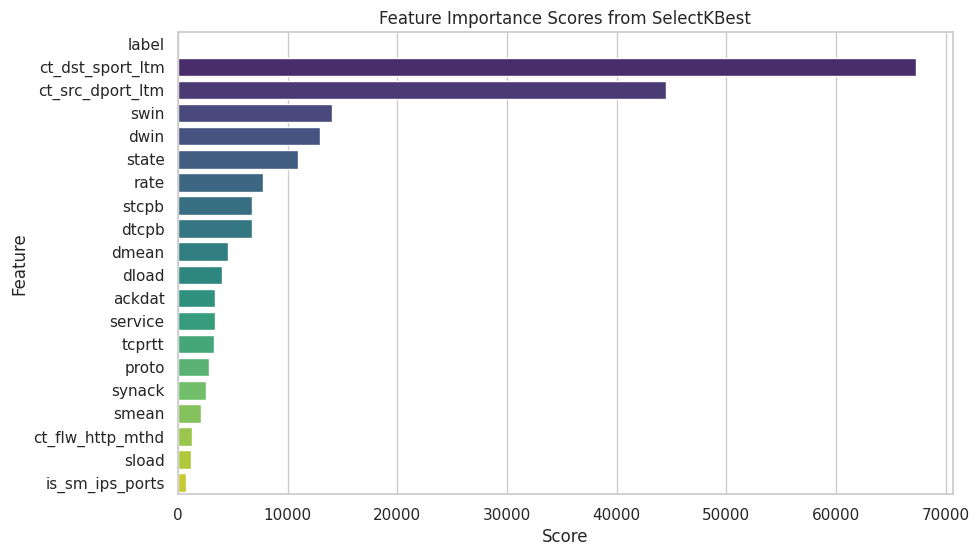

In [19]:
# applying the method to get the essential qualities
from sklearn.feature_selection import SelectKBest,f_classif

k = 20
# acquiring the values using methods
selector=SelectKBest(score_func=f_classif,k=k)

# Developing the methods to determine the characteristics of the object
X_selected=selector.fit_transform(X,y)

# Take out the appropriate attributes' names and indices.
selected_features=selector.get_support(indices=True)
# Getting the names and indices of the features.
selected_feature_names=X.columns[selected_features]

# Retrieve the characteristics-values
feature_scores=selector.scores_[selected_features]

# Make a data frame with the feature names in it.
feature_scores_df=ppd.DataFrame({'Feature': selected_feature_names, 'Score': feature_scores})

# Sort the Data-Frame by score for better visualization
feature_scores_df=feature_scores_df.sort_values(by='Score',ascending=False)

# give the size to the plot
mpl.figure(figsize=(10, 6))
# drawing the bar graph with selecting features
sns.barplot(x='Score',y='Feature',data=feature_scores_df,palette='viridis')
# setting the tittles of the graph
mpl.title('Feature Importance Scores from SelectKBest')
# setting the x-labl in the graph
mpl.xlabel('Score')
# give the y-labl in the graph
mpl.ylabel('Feature')
# displaying the graph
mpl.show()

In [20]:
X[selected_feature_names].shape

(257673, 20)

# Standard Scalling

The sklearn.preprocessing module's usingr is used in this code to normalize the dataset. The first step in standardizing features is to construct a object, which scales to unit variance and removes the mean. After fitting the scaler to the data and converting it, the fit_transform method is performed to the subset of data. This produces X_scaled, a homogenized version of the original data with a mean of 0 and a standard deviation of 1.

In [21]:
from sklearn.preprocessing import StandardScaler

#normalizing the data by using the scalling module
scaler=StandardScaler()

# Transforming the data and fitting that scaler to it
X_scaled=scaler.fit_transform(X[selected_feature_names])

# SMOTEENN

In order to balance an unbalanced dataset, this code illustrates how to apply the technique retrieved from the imblearn library. Initially, for reproducibility, a random seed is used to initialize the object. After that, the scaled characteristic matrix X_scaled as well as the target vector y are subjected to the fit_resample technique. By combining the two methods, a more balanced and clear dataset (X_resampled, y_resampled) is produced. SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic samples for the minority class, while ENN (Edited Nearest Neighbors) eliminates noisy or unclear locations.


In [22]:
from imblearn.combine import SMOTEENN

# showing this library to balanced the data
smote_enn=SMOTEENN(random_state=42)

# Fittng and resample the data-set
X_resampled,y_resampled=smote_enn.fit_resample(X_scaled, y)

# Balance Count Plot

This code first creates a DataFrame from the recreated data (X_resampled and y_resampled), naming the features dynamically as Feature_0, Feature detector_1, and so forth. Y_resampled, which stands for the target labels, is added as a new column called 'attack_cat'. The class distribution found in the 'attack_cat' column is then visualized using a bar plot made with Seaborn's countplot, which indicates how many instances, following the SMOTEENN resampling procedure, belong to each class. mpl.show() is used to display the customized plot, which has a title, named axes, and a color scheme (viridis).

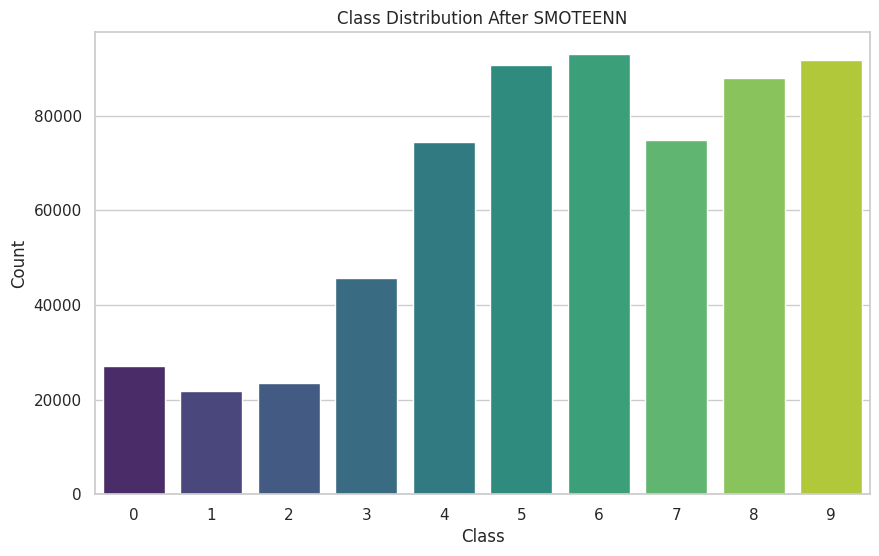

In [23]:
# Converting resampling data to Data-Frame
resampled_df=ppd.DataFrame(X_resampled,columns=[f'Feature_{i}' for i in range(X_resampled.shape[1])])
resampled_df['attack_cat']=y_resampled
# Plotting the class distri-bution
mpl.figure(figsize=(10, 6))
# drawing the counting graph with the specific data
sns.countplot(x='attack_cat',data=resampled_df, palette='viridis')
# setting the tittles of the graph
mpl.title('Class Distribution After SMOTEENN')
# printing the x-labls in the plot
mpl.xlabel('Class')
# adding the labls in the plot
mpl.ylabel('Count')
# visualizing the dataset
mpl.show()

# Splitting Training & Testing

In [24]:
#Creating data sets for both training and assessment using the updated information.
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

# Define Function

This code defines the function evaluate_result(), which computes and visualizes a number of metrics to assess a classification model's performance. Using weighted averages for multi-class classification, it first outputs the model's precision, recall, accuracy, and F1 score based on the real labels (y_true) and predicted labels (y_pred). It has the option to calculate and report the ROC-AUC score in the event that projected probabilities (y_pred_proba) are given. The function then outputs a thorough classification report and shows the link between the true and predicted classes in a heatmap visualization of the confusion matrix. This aids in evaluating the error distribution and overall performance of the model.

In [25]:
def evaluate_result(y_true,y_pred,y_pred_proba=None):
    # evalute the accu from the data
    print("Accuracy: {:.8f}".format(accuracy_score(y_true,y_pred)))

     # use the testing data to compute the preci-vlaue.
    print("Precision: {:.8f}".format(precision_score(y_true,y_pred,average='weighted')))

    # get the reca-value withe the data
    print("Recall: {:.8f}".format(recall_score(y_true,y_pred,average='weighted')))

    # discover the f1socre's value
    print("F1_Score: {:.8f}".format(f1_score(y_true,y_pred,average='weighted')))

    # Drawing the classied tabel with the result
    report=classification_report(y_true,y_pred)
    # showing the result table
    print("Classification Report:\n",report)

    # draw the matrics of plot confusing
    cm=confusion_matrix(y_true,y_pred)
    # draw the confusing matrics of the data
    mpl.figure(figsize=(10, 6))
    # printing the xlabel to the model
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False)
    # use the y label in the graph
    mpl.xlabel("Predicted")
    # show the header in the graph
    mpl.ylabel("True")
    # adding tittles in the graph
    mpl.title("Confusion Matrix")
    # display the matrix
    mpl.show()


To depict the Receiver Operating Characteristic (ROC) curves for a classification with multiple classes problem, this code defines the plot_multiclass_roc function. In order to compute the ROC curve, the area under the curve scores, and binary labels, it first imports the required libraries from sklearn. Next, the function receives as inputs the predicted probabilities (y_pred_proba) and true labels (y_true). It does this by converting the true labels into a binary format, calculating the true positive rates (TPR) and false positive rates (FPR) for every class, and then outputting the AUC (Area Under the Curve) for every class. Additionally, it computes the AUC for the micro-average of the ROC curve, essentially aggregates all classes.The function then creates a plot of the ROC curve for each class in various colors, adds a micro-average curve, as well as presents the plot with the relevant labels, titles, and legends.

In [26]:
# importing the libray with the result
from sklearn.metrics import roc_curve,roc_auc_score,auc
# setting this tag as label in the plot
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc(y_true,y_pred_proba):
    # show the chamber of the data
    n_classes=y_pred_proba.shape[1]

    # Make the output labels binary.
    y_true_bin=label_binarize(y_true,classes=nym.arange(n_classes))

    #Calculating each class's ROC curve as well as ROC AUC
    fpr={}
    tpr={}
    roc_auc={}
    # Looping through to compute the curve.
    for i in range(n_classes):
        #Calculating the socre readings as the probability of the estimator
        fpr[i], tpr[i], _ =roc_curve(y_true_bin[:, i],y_pred_proba[:, i])
        # Identifying the values in the graph's categories
        roc_auc[i]=auc(fpr[i],tpr[i])
         # With eight decimal places of precision, print every ROC-AUC score associated with the i-th class..
        print(f"Class {i} ROC-AUC: {roc_auc[i]:.8f}")
    #Flattening the true basic labels to derive the area under the  curve.
    fpr["micro"], tpr["micro"], _ =roc_curve(y_true_bin.ravel(),y_pred_proba.ravel())
    # Calculating the AUC for the curve.
    roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])
    # Printing the ROC-verage score with eight decimal places.
    print(f"Micro-average ROC-AUC: {roc_auc['micro']:.8f}")

    # Plotting all ROC curves
    mpl.figure(figsize=(10, 8))
    # Generating a list of colors using the rainbow colormap
    colors = mpl.cm.rainbow(nym.linspace(0, 1, n_classes))
    # Looping through each class and its corresponding color
    for i, color in zip(range(n_classes),colors):
        # Plotting the ROC curve for each class with its corresponding color
        mpl.plot(fpr[i],tpr[i],color=color,lw=2,label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
    # Plotting curve, which is a performance measure that aggregates across all classes
    mpl.plot(fpr["micro"],tpr["micro"],color='navy',lw=2, linestyle=':',label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})')
    # Drawing a line along the  as (1, 1) to show of a random classifier.
    mpl.plot([0, 1],[0, 1],color='gray',linestyle='--')
    #Adding labels to the x-lbls in the plots
    mpl.xlim([0.0, 1.0])
    # Setting the y-axis limits to range from 0.0 to 1.05 to allow for some space
    mpl.ylim([0.0, 1.05])
    # Setting the x-labls in the graph
    mpl.xlabel('False Positive Rate')
    # adding the y-axis labls as the plot
    mpl.ylabel('True Positive Rate')
    #printing the titrtles of the plot
    mpl.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
    # Adding a legending to the plot
    mpl.legend(loc="lower right")
    # visualizing the graph
    mpl.show()

# Extra Tree Classifier

This code creates an ExtraTreesClassifier model and uses RandomizedSearchCV to hyperparameter tune it in order to determine the optimal set of parameters. The maximal depth (maximum tree depth), min_samples_leaf (minimum samples needed for a leaf node), and split_samples (minimum samples needed to split a node) are specified in a parameter grid that is defined. Five iterations (n_iter=5) are performed by RandomizedSearchCV in order to examine various parameter combinations. Using the adjusted parameters, the model gets trained on X_train, and the top model (bst_mdel) is chosen based on the search outcomes. Next, using the best model, predictions are generated on the training (X_train) as well as testing (X_test) data.

In [27]:
# using the algorithms with specific para-meter tuning
from sklearn.ensemble import ExtraTreesClassifier
# apply the para-meter tuning to the model
from sklearn.model_selection import RandomizedSearchCV

# Defining model with the creating alias
model_etc = ExtraTreesClassifier()

# Expanding the parameter grid for the alogrithms
param_grid = {
    # List of tree rates to test
    'n_estimators': [50,60,],
    # tabel of learning rates to test
    'max_depth': [10, 20],
    # Listing of maximum depths to test
    'min_samples_split': [2, 5],
    # use leaf value with number
    'min_samples_leaf': [1, 2]

}

#setting the value of this approach using the argument
radm_sech=RandomizedSearchCV(estimator=model_etc,param_distributions=param_grid,n_iter=5,verbose=2,random_state=42,n_jobs=-1)

# Match the training data to the model.
radm_sech.fit(X_train,y_train)

# Using para- metert tuning to choose the best model.
bst_mdel=radm_sech.best_estimator_

# Predicting on the trained data
y_trn_prd_etc=bst_mdel.predict(X_train)
# calculating the prediction with the tested data
y_tst_prd_etc=bst_mdel.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [28]:
# Calculate the probability values for the training and testing data
y_trn_prd_proba_etc=bst_mdel.predict_proba(X_train)
# evaluting value of probality for roc curve
y_tst_prd_proba_etc=bst_mdel.predict_proba(X_test)

In [29]:
# showing the vlaue of good param-meter
print("Best Parameters:", radm_sech.best_params_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}


# Testing Result

Accuracy: 0.88246578
Precision: 0.88306105
Recall: 0.88246578
F1_Score: 0.87872644
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      5330
           1       0.77      0.56      0.65      4428
           2       0.84      0.46      0.59      4634
           3       0.85      0.75      0.80      9081
           4       0.87      0.83      0.85     14952
           5       1.00      1.00      1.00     18119
           6       1.00      1.00      1.00     18532
           7       0.85      0.85      0.85     15067
           8       0.81      0.91      0.86     17575
           9       0.82      0.94      0.88     18441

    accuracy                           0.88    126159
   macro avg       0.87      0.82      0.83    126159
weighted avg       0.88      0.88      0.88    126159



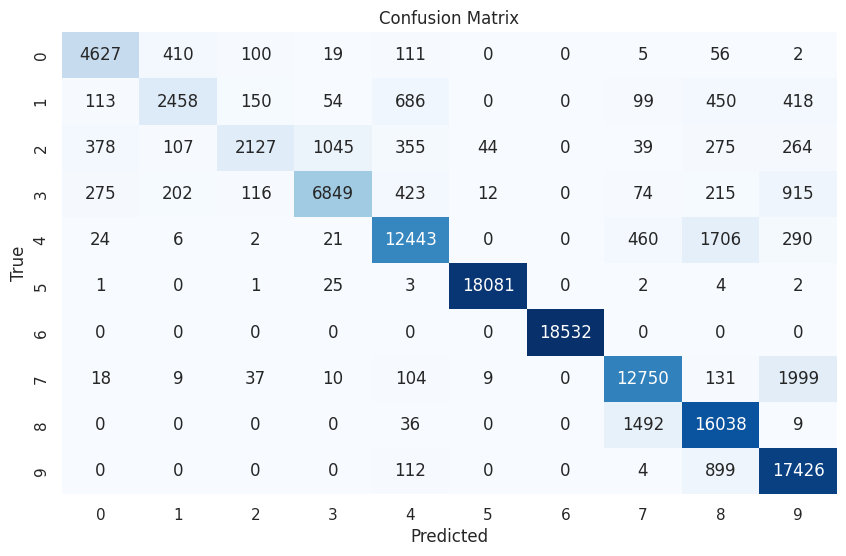

In [30]:
evaluate_result(y_test,y_tst_prd_etc)

Class 0 ROC-AUC: 0.99729542
Class 1 ROC-AUC: 0.98436473
Class 2 ROC-AUC: 0.97650419
Class 3 ROC-AUC: 0.98371177
Class 4 ROC-AUC: 0.98869004
Class 5 ROC-AUC: 0.99989866
Class 6 ROC-AUC: 1.00000000
Class 7 ROC-AUC: 0.98520107
Class 8 ROC-AUC: 0.98983914
Class 9 ROC-AUC: 0.99629195
Micro-average ROC-AUC: 0.99238965


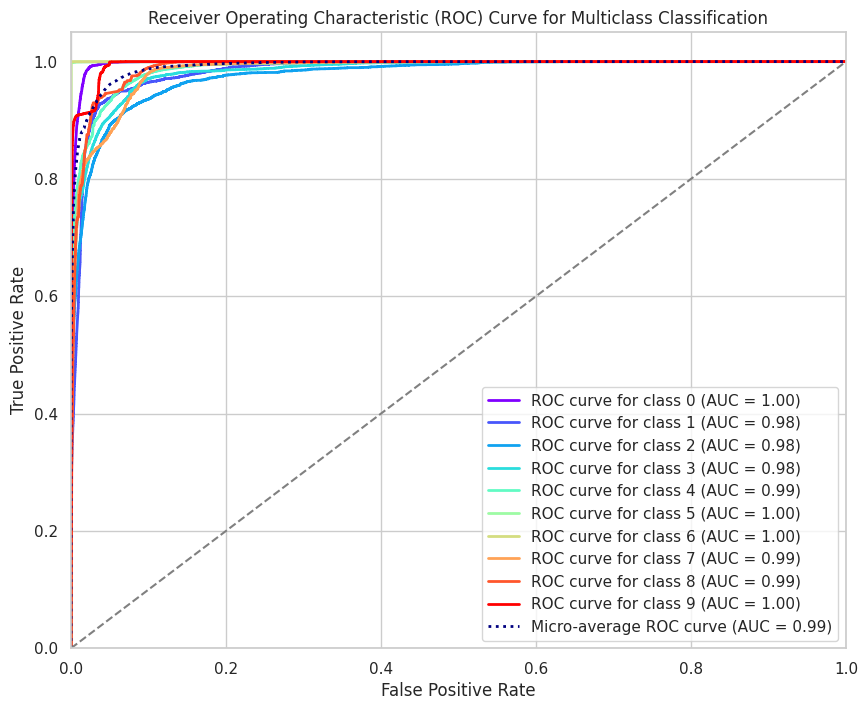

In [31]:
plot_multiclass_roc(y_test,y_tst_prd_proba_etc)

# Training Result

Accuracy: 0.88689426
Precision: 0.88812467
Recall: 0.88689426
F1_Score: 0.88358905
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87     21706
           1       0.79      0.57      0.66     17380
           2       0.86      0.49      0.62     18791
           3       0.87      0.77      0.82     36685
           4       0.88      0.83      0.85     59565
           5       1.00      1.00      1.00     72568
           6       1.00      1.00      1.00     74439
           7       0.86      0.85      0.85     59821
           8       0.81      0.91      0.86     70307
           9       0.82      0.95      0.88     73372

    accuracy                           0.89    504634
   macro avg       0.87      0.83      0.84    504634
weighted avg       0.89      0.89      0.88    504634



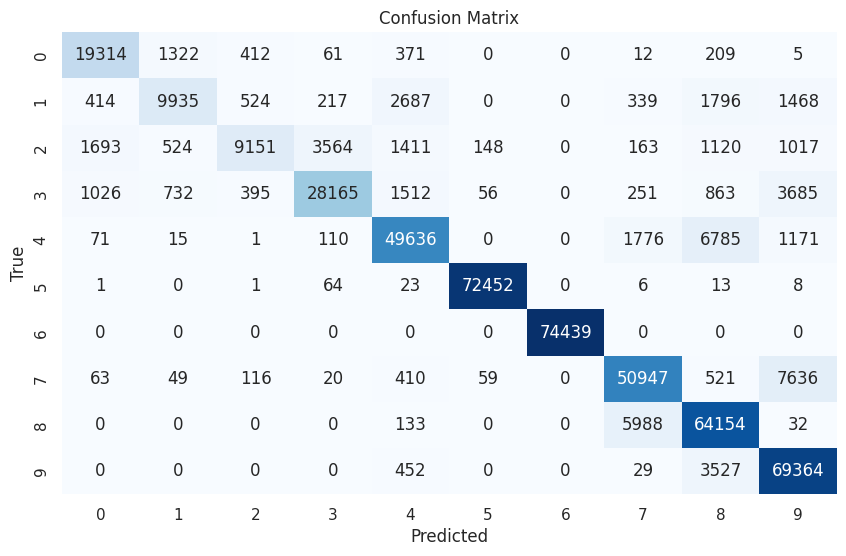

In [32]:
evaluate_result(y_train,y_trn_prd_etc)

Class 0 ROC-AUC: 0.99758624
Class 1 ROC-AUC: 0.98662934
Class 2 ROC-AUC: 0.97898183
Class 3 ROC-AUC: 0.98576567
Class 4 ROC-AUC: 0.98956193
Class 5 ROC-AUC: 0.99998346
Class 6 ROC-AUC: 1.00000000
Class 7 ROC-AUC: 0.98569506
Class 8 ROC-AUC: 0.98995507
Class 9 ROC-AUC: 0.99642516
Micro-average ROC-AUC: 0.99296945


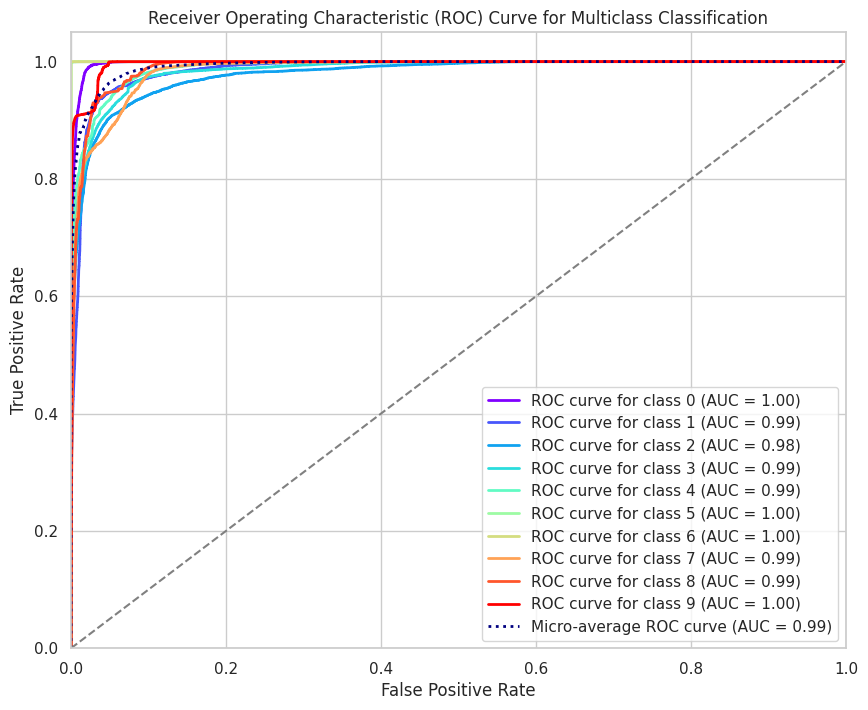

In [33]:
plot_multiclass_roc(y_train,y_trn_prd_proba_etc)

# XGboost Classifier

This code creates a parameter grid (param_dist) allowing hyperparameter tweaking using RandomizedSearchCV and initializes new XGBoost classifier (xgb.XGBClassifier()). The learning rate (learning_rate), maximum depth (max_depth), and number inside estimators (n_estimators) of the trees are among the parameters being adjusted. With n_iter=5, the RandomizedSearchCV is set up to run five iterations while maximizing accuracy. The best estimator (bst_xgb_clf) is chosen after the model has been trained using the training dataset (X_train, y_train). The training and verification datasets (y_train_pred, y_test_pred) are forecasted using this best model, and projected probabilities (y_train_proba, y_test_proba) additionally obtained.

In [34]:
pip install --upgrade xgboost scikit-learn

In [35]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for XGBoost
param_dist = {
    'learning_rate': [0.01, 0.03, 0.5],
    'max_depth': [5, 5, 7],
    'n_estimators': [50, 60,70]
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=200,learning_rate=0.09,max_depth=9,min_child_weight=2,)

# Perform RandomizedSearchCV
rom_srch = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=5,  # Number of iterations (parameter combinations to try)
    scoring='accuracy',  # Scoring metric
    n_jobs=-1,  # Use all available CPU cores
    verbose=2,  # Increase verbosity for more output
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
xgb_clf.fit(X_train, y_train)

# Make predictions using the best model
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

# Get predicted probabilities
y_train_proba = xgb_clf.predict_proba(X_train)
y_test_proba = xgb_clf.predict_proba(X_test)

# Testing Result

Accuracy: 0.96779461
Precision: 0.96741524
Recall: 0.96779461
F1_Score: 0.96731499
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5330
           1       0.90      0.90      0.90      4428
           2       0.90      0.77      0.83      4634
           3       0.91      0.89      0.90      9081
           4       0.96      0.95      0.95     14952
           5       1.00      1.00      1.00     18119
           6       1.00      1.00      1.00     18532
           7       0.98      0.99      0.98     15067
           8       0.95      1.00      0.97     17575
           9       0.99      1.00      1.00     18441

    accuracy                           0.97    126159
   macro avg       0.95      0.94      0.95    126159
weighted avg       0.97      0.97      0.97    126159



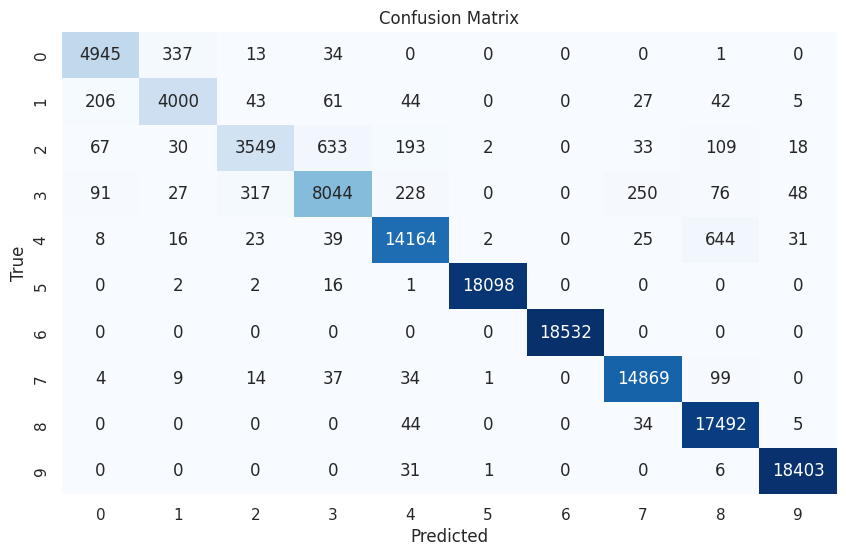

In [36]:
evaluate_result(y_test,y_test_pred)

Class 0 ROC-AUC: 0.99935267
Class 1 ROC-AUC: 0.99882029
Class 2 ROC-AUC: 0.99376570
Class 3 ROC-AUC: 0.99604049
Class 4 ROC-AUC: 0.99863926
Class 5 ROC-AUC: 0.99998781
Class 6 ROC-AUC: 1.00000000
Class 7 ROC-AUC: 0.99969381
Class 8 ROC-AUC: 0.99926048
Class 9 ROC-AUC: 0.99997735
Micro-average ROC-AUC: 0.99945314


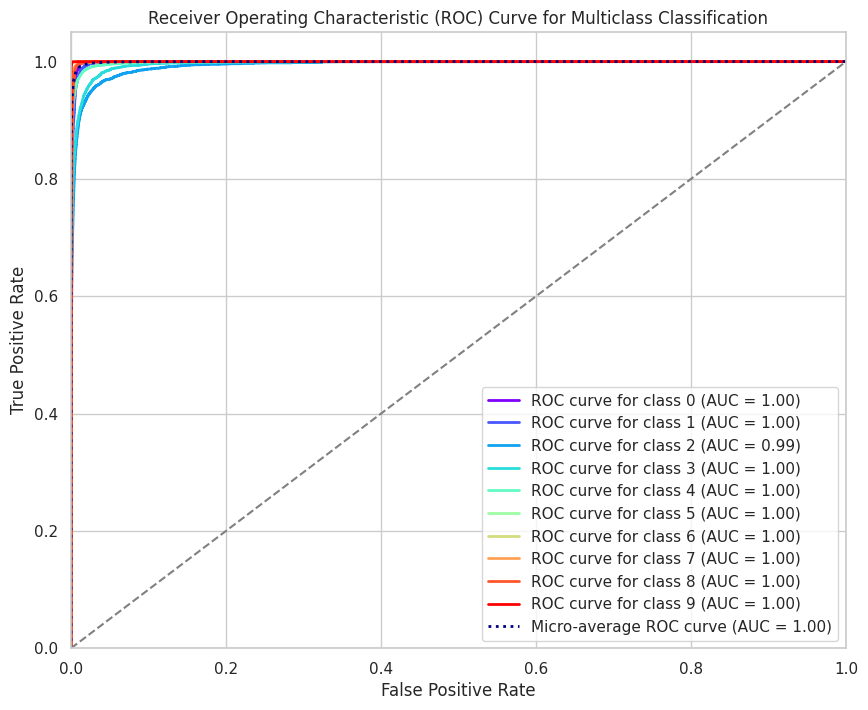

In [37]:
plot_multiclass_roc(y_test,y_test_proba)

# Training Result

Accuracy: 0.97747873
Precision: 0.97740440
Recall: 0.97747873
F1_Score: 0.97726036
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     21706
           1       0.93      0.93      0.93     17380
           2       0.94      0.84      0.89     18791
           3       0.95      0.92      0.94     36685
           4       0.97      0.96      0.97     59565
           5       1.00      1.00      1.00     72568
           6       1.00      1.00      1.00     74439
           7       0.98      0.99      0.99     59821
           8       0.96      1.00      0.98     70307
           9       1.00      1.00      1.00     73372

    accuracy                           0.98    504634
   macro avg       0.97      0.96      0.96    504634
weighted avg       0.98      0.98      0.98    504634



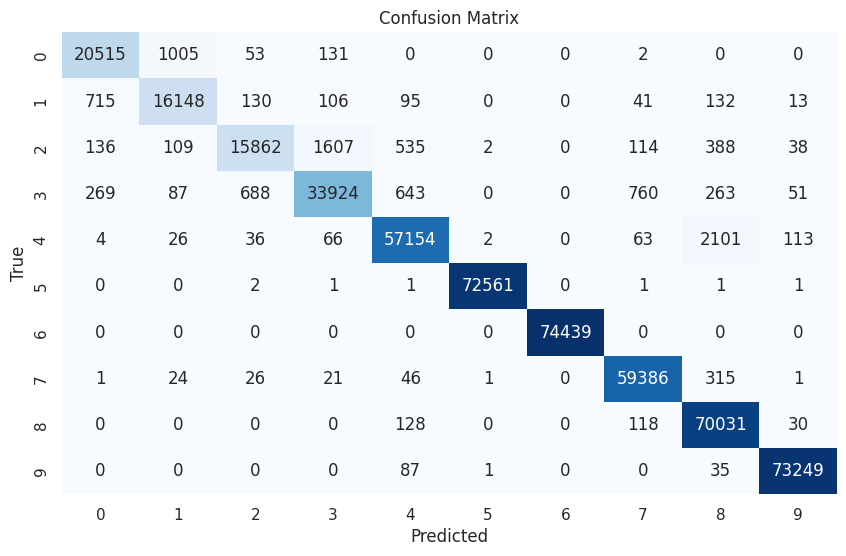

In [38]:
evaluate_result(y_train,y_train_pred)

Class 0 ROC-AUC: 0.99964225
Class 1 ROC-AUC: 0.99934782
Class 2 ROC-AUC: 0.99722889
Class 3 ROC-AUC: 0.99845913
Class 4 ROC-AUC: 0.99930311
Class 5 ROC-AUC: 0.99999991
Class 6 ROC-AUC: 1.00000000
Class 7 ROC-AUC: 0.99986958
Class 8 ROC-AUC: 0.99956666
Class 9 ROC-AUC: 0.99999317
Micro-average ROC-AUC: 0.99973617


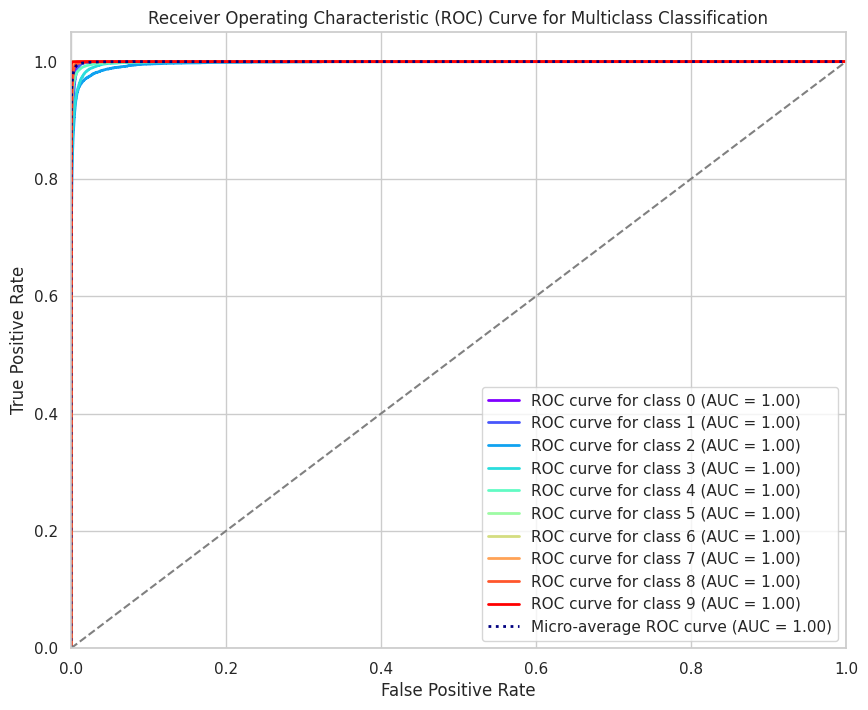

In [39]:
plot_multiclass_roc(y_train,y_train_proba)

# Reshaping Dataset

This code restructures both the testing and the training feature so that each sample's data is represented as a single feature per timestep, creating a 3D structure that is appropriate for input into an LSTM layer. To ensure compliance with LSTM networks, which require input in the form of (samples, timesteps, features), the reshape approach adjusts the final dimension. To further help the model handle classification issues with multiple classes more successfully, the to_categorical function provided Keras is used to transform the target labels from a one-hot encoded format.

In [40]:
# reshaping the final dimension to include one feature per timestep
x_train_reshaped=X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
# Reshaping the last dimension to have 1 feature per timestep, which is required by the LSTM layer
x_test_reshaped=X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [41]:
# use this library for convert the information
from tensorflow.keras.utils import to_categorical

# getting the value of the score of the data.
y_train_categorical=to_categorical(y_train)
# fetching data from the library
y_test_categorical=to_categorical(y_test)


In [7]:
! pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


# LSTM Model

Using Keras and Keras Tuner, this code creates and optimizes an LSTM-based deep learning algorithm to perform multi-class categorization. It imports the required optimizers (Adam, SGD, RMSprop, and Adadelta) and libraries (LSTM, Dropout, along with Dense layers from TensorFlow). A sequential model with adjustable hyperparameters, including LSTM units, dropout rates, as well as optimizer types, is constructed via the build_mdl function. Two LSTM layers (with configurable units), dropout layers to avoid overfitting, including dense layers for classification—including an output layer supporting multi-class classification that is triggered by softmax—make up the model. An accuracy measure and a categorical crossover entropy loss function are used to create the model. The best hyperparameters are found by experimenting with the training set of data using Keras Tuner's RandomSearch. The ideal model is constructed and trained on the shaped training data once the best hyperparameters have been determined. The performance is then assessed using the validation data.The optimal hyperparameters are provided at the end.

In [8]:
# Importing a library for hyperparameter optimization
import kerastuner as kt
#In order to develop neural networks, modeling class
from tensorflow.keras.models import Sequential
# here we use these library for developing the deep learning algorithms
from tensorflow.keras.layers import LSTM, Dense, Dropout
# evaluating the performance on classi-fication using the values.
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta

def build_mdl(hp):
    mdl = Sequential()

    #Tunable units with respective return sequences are added to the layer
    mdl.add(LSTM(units=hp.Int('lstm_units',min_value=32,max_value=128,step=32),return_sequences=True,
                   # giving the shaping of information as inputing to the estimaor
                   input_shape=(x_train_reshaped.shape[1],x_train_reshaped.shape[2])))
    # Adding lyr with tunable dropout rate to prevent overfitting
    mdl.add(Dropout(rate=hp.Float('dropout',min_value=0.2,max_value=0.5,step=0.1)))
    # modfied-layr, also with tunable unitting but no returned sequences
    mdl.add(LSTM(units=hp.Int('lstm_units',min_value=32,max_value=128,step=32),return_sequences=False))
    # To lesen overfiting, add another-layer with an adjustable-rate.
    mdl.add(Dropout(rate=hp.Float('dropout',min_value=0.2,max_value=0.5,step=0.1)))
    # Fully conected lyr with tunabling unitted and methosds
    mdl.add(Dense(units=hp.Int('dense_units',min_value=32,max_value=128,step=32), activation='relu'))
    #For multi_clas clasification, the outpt layr and softmax activated
    mdl.add(Dense(10, activation='softmax'))

    # Selecting optimizer based on tunable choice
    optimizer_name=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
    # Checking if the selected optimizering is vlues
    if optimizer_name == 'adam':
        # provding vluesw the scoreing
        optimizer = Adam()

    elif optimizer_name == 'sgd':
        optimizer = SGD()
    #create an instance of the Stochastic Gradient Descent
    elif optimizer_name == 'rmsprop':
        optimizer=RMSprop()
    else:
        optimizer = Adadelta()
    # filtterd algortimsn with the specific para-meter vlaues in the mdls
    mdl.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return mdl

# setting data of the reshpaed in the algorthms
tuner=kt.RandomSearch(build_mdl,objective='val_accuracy',max_trials=5,executions_per_trial=1)

# Looking for the optimal hyper-para-meter settings
tuner.search(x_train_reshaped,y_train_categorical,epochs=5,validation_data=(x_test_reshaped,y_test_categorical))

# Choosing the opti-mal hyper-pra-metrs and framework.
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters: LSTM Units: {best_hps.get('lstm_units')}, Dense Units: {best_hps.get('dense_units')}, "
      f"Dropout: {best_hps.get('dropout')}, Optimizer: {best_hps.get('optimizer')}")

# Constructing the ideal modeling
best_mdl=tuner.hypermodel.build(best_hps)

# Trained the top mannequin
history=best_mdl.fit(x_train_reshaped,y_train_categorical,epochs=5,validation_data=(x_test_reshaped,y_test_categorical))


<ipython-input-8-99ab7edcefc2>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


NameError: name 'x_train_reshaped' is not defined

In [1]:
# calculated-prediction of the value
y_train_pred=best_mdl.predict(x_train_reshaped)
# findout teh vlaue of predicition of the mdl
y_test_pred=best_mdl.predict(x_test_reshaped)
# findout the vlaue of testing data
y_train_classes=nym.argmax(y_train_categorical,axis=1)
# evaluate- result of the mdl
y_test_classes=nym.argmax(y_test_categorical,axis=1)
## showfoe result of the mdl with the data
trn_prd_clases=nym.argmax(y_train_pred,axis=1)
#Determine the value of the test data.
tet_ped_clases=nym.argmax(y_test_pred,axis=1)

NameError: name 'best_mdl' is not defined

In [3]:
# Assign probability to test and prepare the data.
y_train_roc=best_mdl.predict(x_train_reshaped)
# Calculate the probability for both test and training information sets.
y_test_roc=best_mdl.predict(x_test_reshaped)

NameError: name 'best_mdl' is not defined

# Testing Result

In [ ]:
evaluate_result(y_test_classes, tet_ped_clases)

In [ ]:
plot_multiclass_roc(y_test_classes,y_test_roc)

# Training Result

In [ ]:
evaluate_result(y_train_classes, trn_prd_clases)

In [ ]:
plot_multiclass_roc(y_train_classes,y_train_roc)

# **Before** **Balancing**

In [2]:
# Dividing the refreshed information into data sets for testing as well as training.
X_train_un,X_test_un,y_train_un,y_test_un=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

NameError: name 'train_test_split' is not defined

# Extra Tree Classifier

In [4]:
# Defining th model with the specific para-meter
model_etc=ExtraTreesClassifier()

# Expand the parameter grid for with the algorithms
param_grid = {
    # Increase number of trees
    'n_estimators': [50,60,],
    # Allow deeper trees
    'max_depth': [10, 20],
    # Increase range for splitting
    'min_samples_split': [2, 5],
    # Different strategies for feature selection
    'min_samples_leaf': [1, 2]

}

# Adjusting the hyperpamters using this specific frame-work.
ram_srch=RandomizedSearchCV(estimator=model_etc,param_distributions=param_grid,n_iter=5,verbose=2,random_state=42,n_jobs=-1)

# Fit the model to the training data
ram_srch.fit(X_train_un,y_train_un)

# Getting model from RandomizedSearchCV
bst_modl=ram_srch.best_estimator_

# Predict on the training and testing data
trn_prd_etc=bst_modl.predict(X_train_un)
tst_prd_etc=bst_modl.predict(X_test_un)
# Calculate the probability values for the training and testing data
trn_proba_etc=bst_modl.predict_proba(X_train_un)
tst_proba_etc=bst_modl.predict_proba(X_test_un)

NameError: name 'ExtraTreesClassifier' is not defined

In [ ]:
# showing the vlaue of good param-meter
print("Best Parameters:", ram_srch.best_params_)

# Testing Result

In [ ]:
evaluate_result(y_test_un,tst_prd_etc)

In [ ]:
plot_multiclass_roc(y_test_un,tst_proba_etc)

# Training Result

In [ ]:
evaluate_result(y_train_un,trn_prd_etc)

In [ ]:
plot_multiclass_roc(y_train_un,trn_proba_etc)

# XGBoost Classifier

In [ ]:
# Initializing the algorithms with the specific values
xgb_clf=xgb.XGBClassifier()

# Defining the parameter grid for valeus
param_dist = {
    # Listing of tree rates to test
    'n_estimators': [10,20],
     # use the vlaue of rate of the model
    'learning_rate': [0.01, 0.2],

}

# How the value is applied to the parametric procedure
radon_sch=RandomizedSearchCV(xgb_clf,param_distributions=param_dist,n_iter=5, scoring='accuracy', verbose=1)

# Fit the RandomizedSearchCV
radon_sch.fit(X_train_un, y_train_un)

# Get the best model
bet_xgb_clf=radon_sch.best_estimator_
# Make predictions
y_tran_pd_xg=bet_xgb_clf.predict(X_train_un)
y_tst_pd_xg=bet_xgb_clf.predict(X_test_un)
# Get predicted probabilities
tst_proba=bet_xgb_clf.predict_proba(X_test_un)
tran_proba=bet_xgb_clf.predict_proba(X_train_un)

In [ ]:
# showing the vlaue of good param-meter
print("Best Parameters:", radon_sch.best_params_)

# Testing Result

In [ ]:
evaluate_result(y_test_un,y_tst_pd_xg)

In [ ]:
plot_multiclass_roc(y_test_un,tst_proba)

# Training Result

In [ ]:
evaluate_result(y_train_un,y_tran_pd_xg)

In [ ]:
plot_multiclass_roc(y_train_un,tran_proba)

# Reshaping Data

In [ ]:
# Reshape X_train and X_test for use in models that require 3D input
x_train_reshaped_un=X_train_un.reshape(X_train_un.shape[0], X_train_un.shape[1], 1)
x_test_reshaped_un=X_test_un.reshape(X_test_un.shape[0], X_test_un.shape[1], 1)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your labels.
y_train_categorical_un=to_categorical(y_train_un)
y_test_categorical_un=to_categorical(y_test_un)

In [ ]:
y_test_categorical_un.shape

# LSTM

Using Keras Tuner to optimize hyperparameters, this code creates and constructs an LSTM-based artificial intelligence model. By using hp.Int and hp.Float to dynamically set the amount of LSTM components, dropout rate, which serves and dense layer units, the function build_mol(hp) generates a sequential model that can be modified across a given range. The model consists of two layers: an LSTM layer who returns sequences and uses dropout for regularization, and another LSTM layer that also uses dropout. Softmax activation is used in the final output layer for multi-class classification, and a dense layer is added with ReLU activation.Based on a choice of hyperparameters, the optimizer is chosen from among "adam," "sgd," "rmsprop," or "adadelta."Categorical cross-entropy loss and accuracy are used as the metrics in the model's compilation.Then, the kt.RandomSearchtuner is used to find the optimal set of hyperparameters, including the number of LSTM units, dense units, dropout rates, appropriate optimizer. Following tuning, three epochs of training data are used to train the model, and validation data is supplied for assessment throughout training. The optimal hyperparameters are then reported.

In [ ]:
# Explain how lstm The model works
def build_mol(hp):
   # Construct a ml in sequence
    mol = Sequential()

    # Include a layer depending on the given settings
    mol.add(LSTM(units=hp.Int('lstm_units',min_value=32,max_value=128,step=32),return_sequences=True,

                   # Define the convolutional network layer
                   input_shape=(x_train_reshaped_un.shape[1],x_train_reshaped_un.shape[2])))
    # Adding a layer with a rate selected from a range
    mol.add(Dropout(rate=hp.Float('dropout',min_value=0.2,max_value=0.5,step=0.1)))
    # Fitting a metoding for dimensionality reduction
    mol.add(LSTM(units=hp.Int('lstm_units',min_value=32,max_value=128,step=32),return_sequences=False))
    # Add a densing layerings with specified activated function
    mol.add(Dropout(rate=hp.Float('dropout',min_value=0.2,max_value=0.5,step=0.1)))
    # A choose from layer can be added to add legalization
    mol.add(Dense(units=hp.Int('dense_units',min_value=32,max_value=128, step=32),activation='relu'))
   # Including a lyr with two parameters and units
    mol.add(Dense(10,activation='softmax'))

    # Optimazoring
    optimizer_name=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
    # Checking if the selected optimizered
    if optimizer_name== 'adam':
        # If true, set the optimizing to Adam optim
        optimizer=Adam()
    # Checking if the selected optimizer
    elif optimizer_name=='sgd':
        # If true, set the optimizering to SGD
        optimizer=SGD()
    elif optimizer_name=='rmsprop':
        optimizer=RMSprop()
    else:
        optimizer=Adadelta()
    #Constructing the mdl using the given metrics.
    mol.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return mol

# using Valeus to apply the para-meter tuning in the estimator
tuner=kt.RandomSearch(build_mol,objective='val_accuracy',max_trials=5,executions_per_trial=1)

#Trying to find the ideal hyper-parameters
tuner.search(x_train_reshaped_un,y_train_categorical_un,epochs=5,validation_data=(x_test_reshaped_un,y_test_categorical_un))

#Getting the best model performance with hyper-para-meters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
# displaying the goot para-valeu of the algorithms with each points
print(f"Best hyperparameters: LSTM Units: {best_hps.get('lstm_units')}, Dense Units: {best_hps.get('dense_units')}, "
      f"Dropout: {best_hps.get('dropout')}, Optimizer: {best_hps.get('optimizer')}")

# creating the best algorithms with specific values
best_mol=tuner.hypermodel.build(best_hps)

#providing the trained data to the algorimthsm
history=best_mol.fit(x_train_reshaped_un,y_train_categorical_un,epochs=3,validation_data=(x_test_reshaped_un,y_test_categorical_un))


Considering a trained model (best_mol), this code predicts and converts labels for training and testing data. It begins by predicting the labels for the reshaped training data (x_train_reshaped_un), then uses argmax to take the index of the highest probability and translate the predicted probabilities into class labels. In a same manner, it turns the training data's real category categories into class labels. The procedure is repeated with the test data: both the true and predicted category labels are transformed into class labels, and the model predictions the labels for the rearranged test data (x_test_reshaped_un). This makes it possible to compare the genuine and anticipated labels for assessment reasons.

In [ ]:
# Identifying labels for the simulated data using the most effective model
y_train_pred=best_mol.predict(x_train_reshaped_un)
# Use the index to translate the anticipated probability into class labels.
ytrn_pd_clases=nym.argmax(y_train_pred, axis=1)
#Translating the authentic labels into class labels
ytin_cls=nym.argmax(y_train_categorical_un, axis=1)

# Predicted the categories for the experimental data using the most effective model.
y_tst_ped_lst=best_mol.predict(x_test_reshaped_un)
#Taking the index and converting the anticipated probability to class labels
y_test_pred_classes=nym.argmax(y_tst_ped_lst, axis=1)
# Making the class labels from the genuine labels
y_test_classes=nym.argmax(y_test_categorical_un, axis=1)

In [ ]:
# getting the vlues for the the curved
y_train_prob=best_mol.predict(x_train_reshaped_un)
# obtaining the curved values for the
y_test_prob=best_mol.predict(x_test_reshaped_un)

# Testing Result

In [ ]:
evaluate_result(y_test_classes,y_test_pred_classes)

In [ ]:
plot_multiclass_roc(y_test_classes,y_test_prob)

# Training Result

In [ ]:
evaluate_result(ytin_cls,ytrn_pd_clases)

In [ ]:
plot_multiclass_roc(ytin_cls,y_train_prob)